In [ ]:
#Slight change in the parameter setting 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [25]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [26]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [27]:
dataset_train['Volume'] = dataset_train['Volume'].str.split(',').str.join('').astype('float64')
dataset_train['Close'] = dataset_train['Close'].str.split(',').str.join('').astype('float64')
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   float64
 5   Volume  1258 non-null   float64
dtypes: float64(5), object(1)
memory usage: 59.1+ KB


In [28]:
training_set = dataset_train[['Open', 'High', 'Low', 'Close', 'Volume']].values

In [29]:
training_set.shape

(1258, 5)

In [30]:
training_set[:, 1]

array([332.83, 333.87, 330.75, ..., 794.23, 785.93, 782.78])

In [31]:
training_set[0]

array([3.2525e+02, 3.3283e+02, 3.2497e+02, 6.6359e+02, 7.3805e+06])

In [32]:
#applying feature scaling ( normalization ) on open stock price
from sklearn.preprocessing import MinMaxScaler
sc_open = MinMaxScaler(feature_range = (0,1))
sc_remaining = MinMaxScaler(feature_range = (0,1))
training_set_scaled_open = sc_open.fit_transform(training_set[:, 0:1])
training_set_scaled_vol = sc_remaining.fit_transform(training_set[:, 1:5])

In [33]:
training_set_scaled = np.concatenate((training_set_scaled_open, training_set_scaled_vol), axis = 1)

In [34]:
training_set_scaled

array([[0.08581368, 0.09640129, 0.09044931, 0.23757287, 0.29525831],
       [0.09701243, 0.09834351, 0.09823458, 0.24151427, 0.22993592],
       [0.09433366, 0.09251685, 0.09408623, 0.22878051, 0.26361233],
       ...,
       [0.95725128, 0.95807422, 0.95844067, 0.40495845, 0.04589107],
       [0.93796041, 0.94257381, 0.95033338, 0.40184391, 0.02949139],
       [0.93688146, 0.93669113, 0.93421352, 0.38672602, 0.07056868]])

In [35]:
training_set_scaled[4:8]

array([[0.07984225, 0.07671765, 0.06106986, 0.1785483 , 0.46779736],
       [0.0643277 , 0.06444805, 0.05697833, 0.17947163, 0.35306768],
       [0.0585423 , 0.06033951, 0.06095621, 0.18335791, 0.19262715],
       [0.06568569, 0.063589  , 0.06603273, 0.18841558, 0.15044053]])

In [36]:
#creating a data structure with 60 timesteps and 1 output
X_train, y_train = [], []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [43]:
#first row corresponds to stockprice at the 60th financial day of our trainset 
#all these values are the previous 60 vectors each of length 5 
X_train[0]

array([[0.08581368, 0.09640129, 0.09044931, 0.23757287, 0.29525831],
       [0.09701243, 0.09834351, 0.09823458, 0.24151427, 0.22993592],
       [0.09433366, 0.09251685, 0.09408623, 0.22878051, 0.26361233],
       [0.09156187, 0.08881917, 0.08800576, 0.21641884, 0.21617942],
       [0.07984225, 0.07671765, 0.06106986, 0.1785483 , 0.46779736],
       [0.0643277 , 0.06444805, 0.05697833, 0.17947163, 0.35306768],
       [0.0585423 , 0.06033951, 0.06095621, 0.18335791, 0.19262715],
       [0.06568569, 0.063589  , 0.06603273, 0.18841558, 0.15044053],
       [0.06109085, 0.05806114, 0.06089938, 0.18202114, 0.18517821],
       [0.06639259, 0.06274861, 0.0652561 , 0.18695478, 0.15317982],
       [0.0614257 , 0.06463481, 0.06190332, 0.19290823, 0.22171005],
       [0.07474514, 0.07113377, 0.07071147, 0.2020589 , 0.50660392],
       [0.02797827, 0.02463257, 0.0237536 , 0.12842633, 0.84997597],
       [0.02379269, 0.02244757, 0.02513638, 0.12777862, 0.27406488],
       [0.02409033, 0.02153249, 0.

In [44]:
#based on the above 60 stock prices, we'll train our future RNN to predict the stock price at time t+1
#stock price at time t+1 is nothing but this below one !! 
y_train[0]

array([0.08627874])

In [45]:
X_train.shape

(1198, 60, 5)

In [46]:
#Building the robust RNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout


In [47]:
#initialising the RNN as an instance of the sequential class
regressor = Sequential()

In [48]:
#adding the first LSTM layer and some Dropout regularisation
#dropout regularisation is added to prevent overfitting 
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
regressor.add(Dropout(rate = 0.2))

In [49]:
#adding the 2nd LSTM layer with some dropout regularisation 
regressor.add(LSTM(units = 70, return_sequences = True))
regressor.add(Dropout(rate = 0.3))

In [50]:
#adding the 3rd LSTM layer along with some dropout regularisation
regressor.add(LSTM(units = 90, return_sequences = True))
regressor.add(Dropout(rate = 0.4))

In [51]:
#adding our 4th LSTM layer and some dropout regularisation
regressor.add(LSTM(units = 120))
regressor.add(Dropout(rate = 0.4))

In [52]:
#adding the output layer 
regressor.add(Dense(units = 1))

In [53]:
#attaching our RNN a powerful optimizer and a loss function
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [54]:
#fitting our model to the training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Train on 1198 samples
Epoch 1/100
1198/1198 [==============================] - 8s 6ms/sample - loss: 0.0367
Epoch 2/100
1198/1198 [==============================] - 0s 417us/sample - loss: 0.0081
Epoch 3/100
1198/1198 [==============================] - 1s 421us/sample - loss: 0.0061
Epoch 4/100
1198/1198 [==============================] - 1s 425us/sample - loss: 0.0058
Epoch 5/100
1198/1198 [==============================] - 1s 423us/sample - loss: 0.0055
Epoch 6/100
1198/1198 [==============================] - 1s 424us/sample - loss: 0.0064
Epoch 7/100
1198/1198 [==============================] - 1s 420us/sample - loss: 0.0057
Epoch 8/100
1198/1198 [==============================] - 1s 424us/sample - loss: 0.0049
Epoch 9/100
1198/1198 [==============================] - 1s 424us/sample - loss: 0.0049
Epoch 10/100
1198/1198 [==============================] - 1s 431us/sample - loss: 0.0049
Epoch 11/100
1198/1198 [==============================] - 1s 421us/sample - loss: 0.0052
Epoch 12/1

In [90]:
#importing the real Google stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
dataset_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [91]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    20 non-null     object 
 1   Open    20 non-null     float64
 2   High    20 non-null     float64
 3   Low     20 non-null     float64
 4   Close   20 non-null     float64
 5   Volume  20 non-null     object 
dtypes: float64(4), object(2)
memory usage: 1.1+ KB


In [92]:
dataset_test['Volume'] = dataset_test['Volume'].str.split(',').str.join('').astype('float64')
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    20 non-null     object 
 1   Open    20 non-null     float64
 2   High    20 non-null     float64
 3   Low     20 non-null     float64
 4   Close   20 non-null     float64
 5   Volume  20 non-null     float64
dtypes: float64(5), object(1)
memory usage: 1.1+ KB


In [93]:
realStockPrice = dataset_test['Open'].values
realStockPrice = realStockPrice.reshape(len(realStockPrice),1)

In [94]:
realStockPrice

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [95]:
dataset_test

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,1657300.0
1,1/4/2017,788.36,791.34,783.16,786.90,1073000.0
2,1/5/2017,786.08,794.48,785.02,794.02,1335200.0
3,1/6/2017,795.26,807.90,792.20,806.15,1640200.0
4,1/9/2017,806.40,809.97,802.83,806.65,1272400.0
5,1/10/2017,807.86,809.13,803.51,804.79,1176800.0
6,1/11/2017,805.00,808.15,801.37,807.91,1065900.0
7,1/12/2017,807.14,807.39,799.17,806.36,1353100.0
8,1/13/2017,807.48,811.22,806.69,807.88,1099200.0
9,1/17/2017,807.08,807.14,800.37,804.61,1362100.0


In [96]:
#getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train[['Open', 'High', 'Low', 'Close', 'Volume']], dataset_test[['Open', 'High', 'Low', 'Close', 'Volume']]), axis = 0)
dataset_total

,Open,High,Low,Close,Volume
0,325.25,332.83,324.97,663.59,7380500.0
1,331.27,333.87,329.08,666.45,5749400.0
2,329.83,330.75,326.89,657.21,6590300.0
3,328.34,328.77,323.68,648.24,5405900.0
4,322.04,322.29,309.46,620.76,11688800.0
...,...,...,...,...,...
15,829.62,835.77,825.06,835.67,1494500.0
16,837.81,838.00,827.01,832.15,2973900.0
17,834.71,841.95,820.44,823.31,2965800.0
18,814.66,815.84,799.80,802.32,3246600.0


In [97]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs

array([[7.7900e+02, 7.8048e+02, 7.7554e+02, 7.7686e+02, 1.0707e+06],
       [7.7966e+02, 7.7966e+02, 7.7075e+02, 7.7508e+02, 9.3320e+05],
       [7.7771e+02, 7.8938e+02, 7.7587e+02, 7.8594e+02, 1.1749e+06],
       [7.8666e+02, 7.9228e+02, 7.8058e+02, 7.8307e+02, 1.3725e+06],
       [7.8376e+02, 7.8813e+02, 7.8206e+02, 7.8614e+02, 9.3740e+05],
       [7.8122e+02, 7.8122e+02, 7.7300e+02, 7.7819e+02, 1.3653e+06],
       [7.8165e+02, 7.8395e+02, 7.7600e+02, 7.7853e+02, 8.5250e+05],
       [7.7980e+02, 7.8585e+02, 7.7750e+02, 7.7996e+02, 1.0930e+06],
       [7.8785e+02, 8.0161e+02, 7.8557e+02, 7.9526e+02, 2.0569e+06],
       [7.9824e+02, 8.0460e+02, 7.9803e+02, 8.0150e+02, 1.7668e+06],
       [8.0330e+02, 8.0397e+02, 7.9603e+02, 7.9697e+02, 1.7575e+06],
       [7.9500e+02, 7.9950e+02, 7.9400e+02, 7.9937e+02, 1.2662e+06],
       [8.0490e+02, 8.1518e+02, 8.0482e+02, 8.1311e+02, 1.6975e+06],
       [8.1668e+02, 8.1668e+02, 8.0514e+02, 8.0767e+02, 1.5764e+06],
       [8.0634e+02, 8.0698e+02, 7.

In [98]:
#scaling these inputs
inputs[:, 0:1] = sc_open.transform(inputs[:, 0:1])
inputs[:, 1:5] = sc_remaining.transform(inputs[:, 1:5])
inputs

array([[0.9299055 , 0.93239584, 0.9439309 , 0.39367171, 0.04256308],
       [0.93113327, 0.93086447, 0.93485755, 0.39121867, 0.03705647],
       [0.92750577, 0.94901675, 0.94455599, 0.40618497, 0.04673608],
       [0.94415507, 0.95443255, 0.9534778 , 0.40222979, 0.05464958],
       [0.93876032, 0.94668235, 0.95628125, 0.40646059, 0.03722467],
       [0.93403527, 0.9337778 , 0.93911956, 0.3955046 , 0.05436123],
       [0.93483518, 0.93887613, 0.94480224, 0.39597315, 0.03382459],
       [0.9313937 , 0.94242441, 0.94764358, 0.39794386, 0.04345615],
       [0.94636878, 0.9718565 , 0.96292999, 0.41902898, 0.08205847],
       [0.96569685, 0.97744038, 0.98653205, 0.42762841, 0.07044053],
       [0.97510976, 0.97626384, 0.9827436 , 0.42138555, 0.07006808],
       [0.95966962, 0.96791604, 0.97889832, 0.42469303, 0.05039247],
       [0.97808617, 0.99719872, 0.99939385, 0.4436283 , 0.0676652 ],
       [1.        , 1.        , 1.        , 0.43613136, 0.06281538],
       [0.98076494, 0.98188507, 0.

In [99]:
len(inputs)

80

In [100]:
#creating a data structure with 60 timesteps for test set
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i])

In [101]:
X_test = np.array(X_test)
type(X_test)

numpy.ndarray

In [102]:
X_test.shape

(20, 60, 5)

In [103]:
#these are the previous 60 stock prices of the first financial day of Jan, 2017
#basically this is the last 3 months data from the train set
X_test[0]

array([[0.9299055 , 0.93239584, 0.9439309 , 0.39367171, 0.04256308],
       [0.93113327, 0.93086447, 0.93485755, 0.39121867, 0.03705647],
       [0.92750577, 0.94901675, 0.94455599, 0.40618497, 0.04673608],
       [0.94415507, 0.95443255, 0.9534778 , 0.40222979, 0.05464958],
       [0.93876032, 0.94668235, 0.95628125, 0.40646059, 0.03722467],
       [0.93403527, 0.9337778 , 0.93911956, 0.3955046 , 0.05436123],
       [0.93483518, 0.93887613, 0.94480224, 0.39597315, 0.03382459],
       [0.9313937 , 0.94242441, 0.94764358, 0.39794386, 0.04345615],
       [0.94636878, 0.9718565 , 0.96292999, 0.41902898, 0.08205847],
       [0.96569685, 0.97744038, 0.98653205, 0.42762841, 0.07044053],
       [0.97510976, 0.97626384, 0.9827436 , 0.42138555, 0.07006808],
       [0.95966962, 0.96791604, 0.97889832, 0.42469303, 0.05039247],
       [0.97808617, 0.99719872, 0.99939385, 0.4436283 , 0.0676652 ],
       [1.        , 1.        , 1.        , 0.43613136, 0.06281538],
       [0.98076494, 0.98188507, 0.

In [104]:
X_test.shape

(20, 60, 5)

In [105]:
X_test[0][0][0]

0.9299054989210507

In [106]:
#predicting the stock prices of Jan, 2017 and scaling it back
predictedStockPrice = sc_open.inverse_transform(regressor.predict(X_test))
predictedStockPrice

array([[775.01227],
       [773.6601 ],
       [774.75244],
       [776.93414],
       [780.68884],
       [785.00946],
       [787.7765 ],
       [788.7251 ],
       [788.5361 ],
       [789.3837 ],
       [789.57166],
       [789.5474 ],
       [789.66113],
       [790.134  ],
       [792.078  ],
       [796.1482 ],
       [801.46466],
       [805.3023 ],
       [805.63696],
       [799.67737]], dtype=float32)

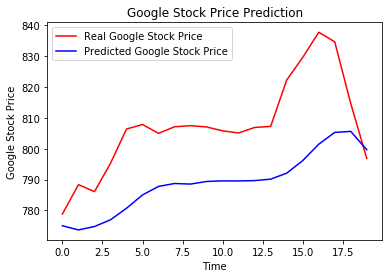

In [107]:
#Visualising the predictions over the real stock prices
plt.plot(realStockPrice, color = 'red', label = 'Real Google Stock Price')
plt.plot(predictedStockPrice, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

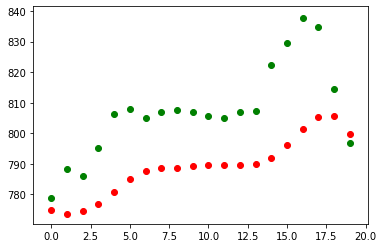

In [111]:
plt.scatter(range(20), predictedStockPrice, c = 'r')
plt.scatter(range(20), realStockPrice, c = 'g')
plt.show()

In [108]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(realStockPrice, predictedStockPrice))

In [109]:
rmse

20.725841767727744

In [110]:
mean_squared_error(realStockPrice, predictedStockPrice)

429.56051698088794